D:\Conda\envs\obspy\lib\site-packages\bayinv\inversion.py:167: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor = ax.pcolormesh(X, Y, cc_matrix, cmap=cmap, norm=normalize)


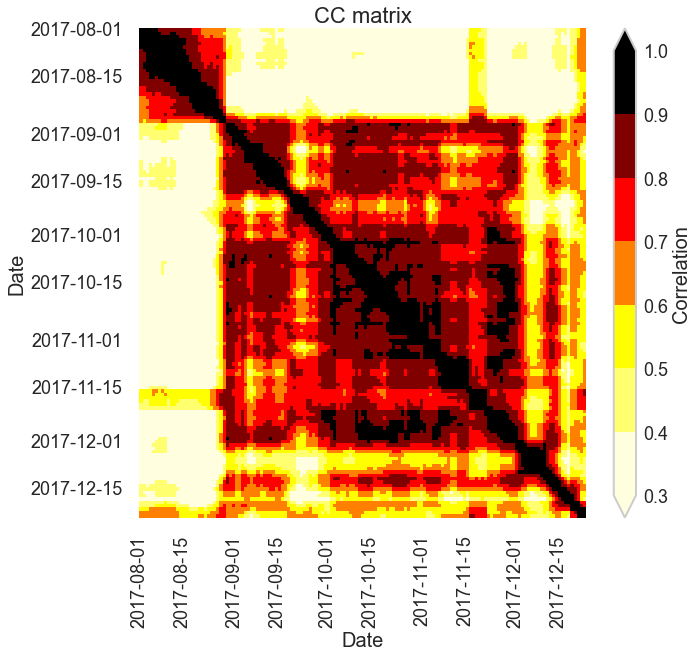

In [1]:
import bayinv
import numpy as np
param = {"df": 10,            # in Hz, sampling rate
          "freqmin": 0.34,    # in Hz, left corner of cross-correlation's pass band 
          "freqmax": 0.9,     # in Hz, right corner of cross-correlation's pass band 
          "dtt_minlag": 3,    # in seconds, minimum correlation time ofset from zero to use in MWCS
          "window_length": 6, # in seconds, windows lenght for MWCS, optimal value is ~2/freqmin
          "window_step": 2,   # in seconds, windows setp for MWCS, optimal value is ~2/freqmax
          "dtt_maxlag": 50,   # in seconds, minimum correlation time ofset from zero to use in MWCS
          "tmin": -50,        # in second, minimum correlation to compute time_axis in MWCS
          "alpha": 100,       # weight factor for inversion, optimal  value is 100 (Gomez-Garcia et al 2018)
          "beta_long": 1000,  # smothing factor for inversion, optimal  value is 1000 for long-term variation                  
          "beta_short": 5     # and  5 for short-term variation (Gomez-Garcia et al. 2018)
        }                     # It is reasonable to vary parameters alpha and beta 
                              # depends on your data and obtained inversion results

# Cross-correlation gather and respectively sequence of date's are only required for perform the inversion
# and plot the results.
# To improve stability of inversion result it's reasonable to average CCF in larger window
cross_corr_mat = np.load(r"example_cross_corr.npy", allow_pickle=True)

array_of_date = np.load(r"example_dates.npy",  allow_pickle=True)

dvv_comb, std_comb = bayinv.mwcs.dv_v_for_combinations(cross_corr_mat, freqmin=param["freqmin"], 
                                                freqmax=param["freqmax"], dtt_minlag=param["dtt_minlag"], 
                                                window_length=param["window_length"], window_step=param["window_step"], 
                                                tmin=param["tmin"], dtt_maxlag=param["dtt_maxlag"], 
                                                df=param["df"] )

cc_matrix, cc_array, comb =bayinv.inversion.correlation_coefficient_matrix(cross_corr_mat, df=param["df"], 
                                                                    dt_minlag=param["dtt_minlag"] )
bayinv.inversion.plot_cc_matrix(cc_matrix, array_of_date)



In [2]:
# Filtering the measurments from Nan and low values of the correlation coefficient between different days 
# By default measurments with correlation coefficient lower than 0.3 are discarded, according to (Gomez-Garcia et al. 2018)
indexes = bayinv.inversion.data_filter(dvv_comb, std_comb, cc_array, cc_treshold=0.3) 


# Formally, only normally distributed measurements can be used in the inversion,
# but I saw visual normality-test only in one article.
# So, use the next function if you want to check data distribution
#bayinv.inversion.plot_data_distribution(dvv_comb[indexes]) 

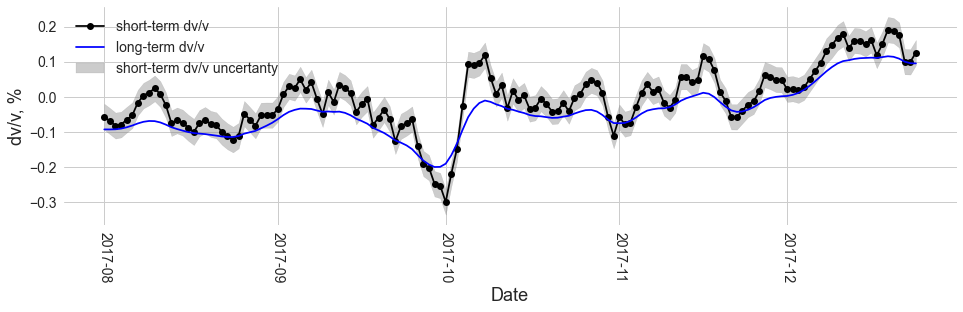

146


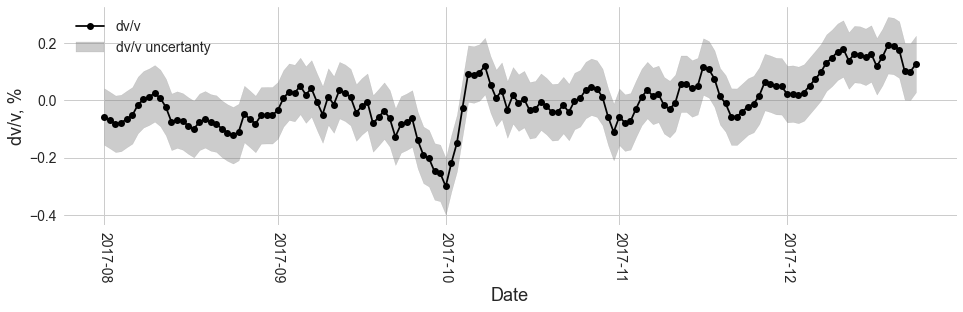

In [3]:
dvv_per_day_short, std_per_day_short = bayinv.inversion.dvv_inversion(dvv_comb, std_comb, 
                                                                      indexes, lenght=cross_corr_mat.shape[0],
                                                                      beta=param["beta_short"], alpha=100)

dvv_per_day_long, std_per_day_long = bayinv.inversion.dvv_inversion(dvv_comb, std_comb, 
                                                                      indexes, lenght=cross_corr_mat.shape[0],
                                                                      beta=param["beta_long"], alpha=100)

bayinv.inversion.plot_dvv_curve(dvv_per_day_short, std_per_day_short, array_of_date,  long_term_dvv = dvv_per_day_long)
print(cross_corr_mat.shape[0])

bayinv.inversion.plot_dvv_curve(dvv_per_day_short, std_per_day_long, array_of_date, long_term_dvv=None)


In [50]:
print(cross_corr_mat.shape)

(314, 1001)


In [5]:
plt.plot()

array([0.03706788, 0.03723874, 0.03700409, 0.03668604, 0.03659424,
       0.03654923, 0.03654046, 0.03645949, 0.03647221, 0.036728  ,
       0.03667855, 0.03658947, 0.03663679, 0.03685801, 0.03692978,
       0.03711526, 0.03739649, 0.03736416, 0.0373867 , 0.03717076,
       0.03714892, 0.03715131, 0.03709686, 0.03659607, 0.03618462,
       0.03605428, 0.03597136, 0.03581661, 0.03593811, 0.03599052,
       0.03597087, 0.03611343, 0.03601214, 0.03604896, 0.03610297,
       0.03626632, 0.03630043, 0.03630278, 0.03635926, 0.03633208,
       0.03622036, 0.03607078, 0.03607706, 0.03603241, 0.03597443,
       0.03593104, 0.03593458, 0.03604218, 0.03608261, 0.03613843,
       0.03620093, 0.03628558, 0.03609491, 0.03598362, 0.03594864,
       0.03600671, 0.03602329, 0.03613909, 0.03621388, 0.03624346,
       0.03610383, 0.03613884, 0.03615371, 0.0359972 , 0.03611763,
       0.03608736, 0.03600975, 0.03587142, 0.035932  , 0.03588907,
       0.03591555, 0.03599687, 0.03596353, 0.03600301, 0.03586